# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/danield2255/data-on-songs-from-billboard-19992019


Import the necessary libraries and create your dataframe(s).

In [1]:
import pandas as pd 
import numpy as np 



billboard_df= pd.read_csv('../billboard_data/billboardHot100_1999-2019.csv')
song_attributes_df= pd.read_csv('../billboard_data/songAttributes_1999-2019.csv')
grammy_albums_df=pd.read_csv('../billboard_data/grammyAlbums_199-2019.csv')
grammy_songs_df= pd.read_csv('../billboard_data/grammySongs_1999-2019.csv')
artist_df = pd.read_csv('../billboard_data/artistDf.csv')

## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [2]:
#Taking a look at the non-null count for each column

billboard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       97225 non-null  int64  
 1   Artists          97225 non-null  object 
 2   Name             97225 non-null  object 
 3   Weekly.rank      97225 non-null  int64  
 4   Peak.position    90156 non-null  float64
 5   Weeks.on.chart   90156 non-null  float64
 6   Week             97225 non-null  object 
 7   Date             84978 non-null  object 
 8   Genre            97225 non-null  object 
 9   Writing.Credits  90012 non-null  object 
 10  Lyrics           97225 non-null  object 
 11  Features         21289 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 8.9+ MB


In [3]:
#Changing the week dtype to date in order to break out year and month for further use. 

billboard_df['Week']= pd.to_datetime(billboard_df['Week'])

billboard_df['Year']=billboard_df['Week'].dt.year

billboard_df['Month']= billboard_df['Week'].dt.month

In [4]:
#breaking out each individual song with genre list to create comperehensive list of genres for each song

solo_songs=billboard_df.copy()
solo_songs=solo_songs.groupby(['Name','Artists'])['Genre'].max().to_frame().reset_index()



#splitting songs into list to break them out into individual rows. Row for each applicable genre. 
solo_songs['Genre.list']=solo_songs['Genre'].str.split(',')


#Breaks each genre out into an individual row
genre_list=solo_songs['Genre.list'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')



#merging broken out genres back with original list of songs. 
solo_songs_genres=pd.merge(solo_songs, genre_list, left_index=True, right_index=True)
solo_songs_genres.rename(columns={'value':'solo_genre'}, inplace=True)

solo_songs_genres.drop(columns='Genre.list', inplace=True)

solo_songs_genres.head()




,Name,Artists,Genre,solo_genre
0,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",West Coast
0,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",R&;B
0,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",Rap
1,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",Electronic
1,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",Electro-Pop


In [5]:

#Making all genre content lowercase to aid in replacing values.
solo_songs_genres['solo_genre']=solo_songs_genres['solo_genre'].str.lower()




#country
solo_songs_genres['solo_genre']= ['country' if 'country' in x else x for x in solo_songs_genres['solo_genre']]


#hip hop
solo_songs_genres['solo_genre']= ['hip hop' if 'hip-hop' in x or 'hiphop' in x  or 'hip hop' in x else x for x in solo_songs_genres['solo_genre']]

#pop
solo_songs_genres['solo_genre']= ['pop' if 'pop' in x else x for x in solo_songs_genres['solo_genre']]


#rock
solo_songs_genres['solo_genre']= ['rock' if 'rock' in x else x for x in solo_songs_genres['solo_genre']]


#rap
solo_songs_genres['solo_genre']= ['rap' if 'rap' in x else x for x in solo_songs_genres['solo_genre']]


#dance/electronic/house
solo_songs_genres['solo_genre']= ['dance/electronic/house' if 'dance' in x  or 'electronic' in x or 'house' in x or 'dubstep' in x else x for x in solo_songs_genres['solo_genre']]


#alternative/indie
solo_songs_genres['solo_genre']= ['alternative/indie' if 'alternative' in x or 'indie' in x else x for x in solo_songs_genres['solo_genre']]




#R&B
solo_songs_genres['solo_genre']= ['r&b' if 'r&b' in x or 'r & b' in x or 'r&;b' in x else x for x in solo_songs_genres['solo_genre']]



#designating any other genre as "other" for ease of analysis
solo_songs_genres['solo_genre']=np.where((solo_songs_genres['solo_genre'] != 'pop') & (solo_songs_genres['solo_genre'] != 'country') & (solo_songs_genres['solo_genre'] != 'rock') & (solo_songs_genres['solo_genre'] != 'rap') & (solo_songs_genres['solo_genre'] != 'dance/electronic/house') & (solo_songs_genres['solo_genre'] != 'alternative/indie') & (solo_songs_genres['solo_genre'] != 'hip hop') & (solo_songs_genres['solo_genre'] != 'r&b'), 'others', solo_songs_genres['solo_genre'])

solo_songs_genres['solo_genre'].value_counts()


others                    4820
pop                       4685
rap                       3199
rock                      2331
r&b                       1337
country                   1306
dance/electronic/house     713
alternative/indie          530
hip hop                    329
Name: solo_genre, dtype: int64

In [6]:
#Many of the listed genres will now be duplicates, this is expected and okay. I will drop them. 
solo_songs_genres.duplicated().value_counts()

False    13754
True      5496
dtype: int64

In [7]:
solo_songs_genres.count()

Name          19250
Artists       19250
Genre         19250
solo_genre    19250
dtype: int64

In [8]:
#Any genres that may have been reduced down to the same main genre more than once is dropped out of the analysis. 
solo_songs_genres.drop_duplicates(inplace=True)

solo_songs_genres.count()

Name          13754
Artists       13754
Genre         13754
solo_genre    13754
dtype: int64

In [9]:
solo_songs_genres.head()


,Name,Artists,Genre,solo_genre
0,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",others
0,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",r&b
0,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",rap
1,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",dance/electronic/house
1,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",pop


In [10]:
#If a song has genres that hit the main genre categories I created, I don't want to include those songs in the 
# 'others' category too. So I am isolating the count of genres each song has in order to drop conditionally by that
# later on 
tester = solo_songs_genres.groupby(['Name','Artists'])['Name'].count()

tester=tester.to_frame()
tester.rename(columns={tester.columns[0]:'number_of_genres'}, inplace=True)

tester.reset_index(inplace=True)

#tester


#Merging the genre count back to my solo_songs_genres df 
songs_merge=solo_songs_genres.merge(tester, how='left', on=['Name','Artists'] )


#I plan to drop based on the index, currently the index repeats from breaking out the individual genres earlier
songs_merge.reset_index(inplace=True)



#Dropping rows where number of genres are greater than one AND == 'others'. This was the best solution I found
# to dropping these duplicate/extra 'others' genres. This will prevent me from having skewed data. 
songs_merge.drop(songs_merge[(songs_merge['number_of_genres']>1) & (songs_merge['solo_genre']=='others')].index, inplace=True)




#Since I dropped the rows with songs that have those dupes, the number_of_genres column no longer accurately 
# represents any significant data. getting rid of it. 
songs_merge.drop(columns=('number_of_genres'), inplace=True)




#I've dropped from 19000+ rows of data down to a much more precise and usable 11,000. This does not represent a 
# loss of usable data as breaking out the genres into a separate row for each greatly inflated the number of rows. 
songs_merge.count()


index         11115
Name          11115
Artists       11115
Genre         11115
solo_genre    11115
dtype: int64

In [11]:
songs_merge.drop(songs_merge.columns[0], axis=1, inplace=True)

songs_merge.head()

,Name,Artists,Genre,solo_genre
1,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",r&b
2,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",rap
3,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",dance/electronic/house
4,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",pop
6,0 To 100 / The Catch Up,Drake,"Canada,Producer,Rap",rap


In [12]:
songs_merge['og_genre_count']=songs_merge['Genre'].str.count(',')
songs_merge['og_genre_count']+=1
songs_merge

,Name,Artists,Genre,solo_genre,og_genre_count
1,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",r&b,3
2,'03 Bonnie & Clyde,Jay,"West Coast,R&;B,Rap",rap,3
3,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",dance/electronic/house,3
4,...Ready For It?,Taylor Swift,"Electronic,Electro-Pop,Pop",pop,3
6,0 To 100 / The Catch Up,Drake,"Canada,Producer,Rap",rap,3
...,...,...,...,...,...
13747,sobeautiful,Musiq Soulchild,"Soul,R&;B",r&b,2
13749,whoa,XXXTENTACION,"Lo-Fi,Chillstep,Pop",pop,3
13751,whoknows,Musiq,"Soul,Soul Pop,Neo Soul,R&;B",pop,4
13752,whoknows,Musiq,"Soul,Soul Pop,Neo Soul,R&;B",r&b,4


In [13]:
#Exporting my final and cleaned dataframe for use.

song_genres=songs_merge

song_genres.to_csv('song_genres.csv')

In [14]:
#I noticed Lil Nas had a comma at the end when it shouldn't have. Planning on counting the occurance of ',' to 
# create column indicating number of artists on a song. 

billboard_df['Artists']=billboard_df['Artists'].str.strip(',')
billboard_df.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month
0,1,Lil Nas,Old Town Road,1,1.0,7.0,2019-07-06,5-Apr-19,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus,2019,7
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,21-Jun-19,Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN,2019,7
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,29-Mar-19,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN,2019,7
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,7-Feb-19,"Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN,2019,7
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,10-May-19,"Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN,2019,7


In [15]:
#An interesting metric to possibly analyze down the road. 

billboard_df['number_artists']=billboard_df['Artists'].str.count(',')


#adding a +1 to each, counting the number of commas leaves the number less one. 
billboard_df['number_artists']+=1

billboard_df.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
0,1,Lil Nas,Old Town Road,1,1.0,7.0,2019-07-06,5-Apr-19,"Country,Atlanta,Alternative Country,Hip-Hop,Tr...","Jozzy, Atticus ross, Trent reznor, Billy ray c...","Old Town Road Remix \nOh, oh-oh\nOh\nYeah, I'm...",Billy Ray Cyrus,2019,7,1
1,2,"Shawn Mendes, Camila Cabello",Senorita,2,NaN,NaN,2019-07-06,21-Jun-19,Pop,"Cashmere cat, Jack patterson, Charli xcx, Benn...",Senorita \nI love it when you call me senorita...,NaN,2019,7,2
2,3,Billie Eilish,Bad Guy,3,2.0,13.0,2019-07-06,29-Mar-19,"Hip-Hop,Dark Pop,House,Trap,Memes,Alternative ...","Billie eilish, Finneas","bad guy \nWhite shirt now red, my bloody nose\...",NaN,2019,7,1
3,4,Khalid,Talk,4,3.0,20.0,2019-07-06,7-Feb-19,"Synth-Pop,Pop","Howard lawrence, Guy lawrence, Khalid",Talk \nCan we just talk? Can we just talk?\nTa...,NaN,2019,7,1
4,5,"Ed Sheeran, Justin Bieber",I Don't Care,5,2.0,7.0,2019-07-06,10-May-19,"Canada,UK,Dance,Dance-Pop,Pop","Ed sheeran, Justin bieber, Shellback, Max mart...",I Don't Care \nI'm at a party I don't wanna be...,NaN,2019,7,2


In [16]:

#Exploring where peak.position is null to determine next steps. Isolating the songs that have a NaN value there
# then rejoining to combine will the rest of the records for those songs, get an idea of any patterns in the issue

# test_2=billboard_df[billboard_df['Peak.position'].isnull()].groupby(['Name','Artists'])['Name'].count()
# test_2=test_2.to_frame()
# test_2.rename(columns={test_2.columns[0]:'song_count'},inplace=True)

# test_2.reset_index(inplace=True)

# test_2

# billboard_to_merge=billboard_df.copy()

# billboard_merge=billboard_to_merge.merge(test_2, on=['Name','Artists'], how='inner')

# billboard_merge

In [17]:
# billboard_df[billboard_df['Peak.position'].isnull()]

In [18]:
# #Isolated one specific instance to ID the issue and explore ways to remedy. 
# lil_nas=billboard_df[billboard_df['Artists']=='Lil Nas']

# lil_nas=lil_nas.sort_values(by='Week')


# chart=0
# for i in range(1, len(lil_nas) + 1):
#     j = lil_nas.columns.get_loc('Weeks.on.chart')
#     chart+=1
#     lil_nas.iat[i - 1, j] = chart
 


In [19]:
# #I discovered that there were multiple different values for peak position just for this one song. Peak position 
# # should remain the same for every single record. 
# lil_nas['Peak.position']=lil_nas['Peak.position'].min()

# lil_nas

In [20]:


#billboard_corrected[billboard_corrected['Name']=="'03 Bonnie & Clyde"]

In [21]:
#In exploring rows that had a null value for Peak.position, I discovered that some rows didn't have a consistent 
# value for Peak.position. That value should be the same for every row a song has. So instead of addressing just
# the rows with NaN values, I took a route to accurately update peak position for every song/row. 


# #isolating the minimum value for each song so I can then re-merge that to the DF and replace the initial values.
# new_peak=billboard_df.copy()
# new_peak=new_peak.groupby(['Name','Artists'])['Peak.position'].min().to_frame()
# new_peak=new_peak.reset_index()
# new_peak.rename(columns={'Peak.position':'New.peak'}, inplace=True)


# #Merging left here on both columns so I don't end up with duplicates. This lines up my New.peak with each occurance
# # of the corresponding song.
# billboard_corrected=billboard_df.copy()
# billboard_corrected=billboard_corrected.merge(new_peak, on=['Name','Artists'], how='left')



# #Setting Peak.position = to New.peak for all rows to accurately update this
# billboard_corrected['Peak.position']=billboard_corrected['New.peak']


# #Any remaining null values for Peak.position tells me that song only appears in the dataframe once. Which suggests
# # incomplete information on that song's path on the top 100. I will remove these songs. 
# billboard_corrected[billboard_corrected['Peak.position'].isnull()]

In [22]:
#Dropping the remaining rows missing that data.
# billboard_corrected.drop(billboard_corrected[billboard_corrected['Peak.position'].isnull()].index, inplace=True)

# billboard_corrected.info()


In [23]:
#Isolating songs that have null values for Weeks.on.chart and then rejoining with the rest of the records for 
# those songs to ID any patterns and decide how to remedy. 

test_3=billboard_df[billboard_df['Weeks.on.chart'].isnull()].groupby(['Name','Artists'])['Name'].count()
test_3=test_3.to_frame()
test_3.rename(columns={test_3.columns[0]:'song_count'},inplace=True)

test_3.reset_index(inplace=True)


#isolating songs that are missing values for more than one record first. ID any additional issues there. 
more_than_one=test_3[test_3['song_count']>1]
more_than_one

,Name,Artists,song_count
121,A Thousand Years,Christina Perri,2
380,As Long As You Love Me,Justin Bieber,2
4523,Outta Control,50 Cent,2
5425,Somebody To Love,Glee Cast,2
5742,T,Shirt,3


In [24]:
billboard_corrected=billboard_df.copy()
tester=billboard_corrected.merge(more_than_one, on=['Name','Artists'], how='inner')

tester.sort_values(['Name','Artists','Week'])


#if index/locationisnull == True 
#then value = previous index location value + 1 
#when sorted by song then date. 

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists,song_count
120,37957,Christina Perri,A Thousand Years,74,NaN,NaN,2011-11-03,18-Oct-11,"Screen,Pop,Soundtrack","Christina perri, David hodges",A Thousand Years \nHeart beats fast\nColors an...,NaN,2011,11,1,2
119,37885,Christina Perri,A Thousand Years,95,74.0,2.0,2011-11-10,18-Oct-11,"Screen,Pop,Soundtrack","Christina perri, David hodges",A Thousand Years \nHeart beats fast\nColors an...,NaN,2011,11,1,2
118,37760,Christina Perri,A Thousand Years,59,59.0,3.0,2011-11-17,18-Oct-11,"Screen,Pop,Soundtrack","Christina perri, David hodges",A Thousand Years \nHeart beats fast\nColors an...,NaN,2011,11,1,2
117,37653,Christina Perri,A Thousand Years,46,46.0,4.0,2011-11-24,18-Oct-11,"Screen,Pop,Soundtrack","Christina perri, David hodges",A Thousand Years \nHeart beats fast\nColors an...,NaN,2011,11,1,2
116,37555,Christina Perri,A Thousand Years,43,43.0,5.0,2011-12-01,18-Oct-11,"Screen,Pop,Soundtrack","Christina perri, David hodges",A Thousand Years \nHeart beats fast\nColors an...,NaN,2011,12,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,10413,Shirt,T,39,19.0,21.0,2017-06-24,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,6,1,3
3,10317,Shirt,T,41,19.0,22.0,2017-07-01,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,7,1,3
2,10225,Shirt,T,47,19.0,23.0,2017-07-08,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,7,1,3
1,10128,Shirt,T,49,19.0,24.0,2017-07-15,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,7,1,3


In [25]:
#Here I am sorting the values by Name of the song, then Artist, then week date. This allows me to iterate through
# rows chronologically by date and utilize that organization to fill in some missing values. 

weeks_on_fix=billboard_corrected.sort_values(['Name','Artists','Week'])

#Resetting the index in order to iterate and changes values based on the index, now that songs are listed 
# chronologically 
weeks_on_fix.reset_index(drop=True, inplace=True)


#Using the logic that once in the correct order, the Weeks.on.chart NaN values should equal the next value in the 
# dataframe minus 1. applying that logic. 
for index, row in weeks_on_fix.iterrows():
    j = weeks_on_fix.columns.get_loc('Weeks.on.chart')
    if(pd.isnull(row['Weeks.on.chart'])):
        weeks_on_fix.iat[index,j]=weeks_on_fix.iat[index+1,j]-1

In [26]:
#checking for any remaining values that may have been missed based on where they were located in the mix.
weeks_on_fix[weeks_on_fix['Weeks.on.chart'].isnull()]

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
162,2651,21 Savage,1.5,86,NaN,NaN,2019-01-05,21-Dec-18,"Motown,Trap,Rap","Nils, Wheezy, Offset, 21 savage","1.5 \nMy earrings cost a half a ticket, I don'...",NaN,2019,1,1
190,19464,Mac Miller,100 Grandkids,100,NaN,NaN,2015-08-28,7-Aug-15,Rap,"Sayez, Eric e dan dan, Big jerm, Sha money xl,...",100 Grandkids \nWoah-oh\nHey!\nWow-wow-wow-wow...,NaN,2015,8,1
248,5040,Drake,14-Mar,57,NaN,NaN,2018-07-14,29-Jun-18,"Canada,R&;B,Rap","Dangelo, Shawn stockman, Nathan morris, Raphae...","March 14 \nHere we go, yeah\nYesterday morning...",NaN,2018,7,1
279,25562,Brantley Gilbert,17 Again,90,NaN,NaN,2014-05-23,19-May-14,"Country,Rock",NaN,17 Again \nThere ain't nothing like them first...,NaN,2014,5,1
280,23027,One Direction,18,87,NaN,NaN,2014-11-28,17-Nov-14,"Boy Band,UK,Pop","Oliver frank, Ed sheeran",18 \nI got a heart and I got a soul\nBelieve m...,NaN,2014,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96964,33959,2 Chainz,Yuck!,80,NaN,NaN,2012-08-31,14-Aug-12,Rap,"2 chainz, Lil wayne, Streetrunner, Matthew bur...",Yuck! \nYuck daddy\nYuck daddy\nCut the top of...,Lil Wayne,2012,8,1
97013,11950,Future,Zoom,99,NaN,NaN,2017-03-11,17-Feb-17,"Trap,Rap","Future, Southside, Llmind, Eduardo earle jr","Zoom \nBought a drop top Porsche, about to cut...",NaN,2017,3,1
97069,40772,Ke$ha,fuck Him He's A DJ,97,NaN,NaN,2011-04-07,18-Mar-11,"Electro-Pop,Dance-Pop,Hi-Nrg,Pop","Miriam nervo, Olivia nervo, Tom neville, Kesha","Fuck Him He's a DJ \nDrop this, drop this, dro...",NaN,2011,4,1
97090,9777,Meek Mill,fuck That Check Up,97,NaN,NaN,2017-08-12,21-Jul-17,"Trap,Rap","Lil uzi vert, Meek mill","Fuck That Check Up \nLil' fish, yeah\nIf you c...",Lil Uzi Vert,2017,8,1


In [27]:
#correcting the two remaining columns individually.
j = weeks_on_fix.columns.get_loc('Weeks.on.chart')
weeks_on_fix.iat[5046,j]=30


#dropping last remaining null value, it was a completely different year and didn't make sense.
weeks_on_fix=weeks_on_fix.drop(weeks_on_fix[weeks_on_fix['Weeks.on.chart'].isnull()].index) 

billboard_corrected=weeks_on_fix


billboard_corrected=billboard_corrected.reset_index(drop=True)

billboard_corrected.head()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
0,81657,Jay,'03 Bonnie & Clyde,56,NaN,1.0,2002-10-22,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,10,1
1,81550,Jay,'03 Bonnie & Clyde,36,36.0,2.0,2002-10-29,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,10,1
2,81451,Jay,'03 Bonnie & Clyde,25,25.0,3.0,2002-11-05,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,11,1
3,81353,Jay,'03 Bonnie & Clyde,17,17.0,4.0,2002-11-12,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,11,1
4,81258,Jay,'03 Bonnie & Clyde,12,12.0,5.0,2002-11-19,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,11,1


In [28]:
# #checking out and isolating the records where the peak.position is null because it is the first week the song
# # appears on the list and replacing those values. 
# peak_null=billboard_corrected[billboard_corrected['Peak.position'].isnull()]
# peak_week_one=peak_null[peak_null['Weeks.on.chart']==1]


# #pulling the index to iterated through the full dataframe only on those records. 
# index=peak_week_one.index
# index=list(index)


# wr=billboard_corrected.columns.get_loc('Weekly.rank')
# pp=billboard_corrected.columns.get_loc('Peak.position')


# #setting those NaN values == to that first weeks Weekly.rank as it would technically be its peak position at that
# #  point 
# for i in range(len(index)):
#     billboard_corrected.iat[index[i],pp]=billboard_corrected.iat[index[i],wr]
    
# billboard_corrected.iloc[index]
    


In [29]:
#peak_null_still

In [30]:


# billboard_corrected=billboard_corrected.drop(billboard_corrected[billboard_corrected['Name']=='Anybody'].index)
# billboard_corrected=billboard_corrected.reset_index(drop=True)

# peak_null_still=billboard_corrected[billboard_corrected['Peak.position'].isnull()]

# peak_null_still

# #after checking several instances of NaN values existing for songs that didn't have records for week 1 and only
# # week two. I made the generalized assumption that each of these records with NaN values @ week 2 were missing
# # week one value and peak.position should be set = to weekly.rank for those records.
# week_two=peak_null_still[peak_null_still['Weeks.on.chart']==2]
# week_two

# index=week_two.index
# index=list(index)


# wr=billboard_corrected.columns.get_loc('Weekly.rank')
# pp=billboard_corrected.columns.get_loc('Peak.position')


# #setting those NaN values == to that first weeks Weekly.rank as it would technically be its peak position at that
# #  point 
# for i in range(len(index)):
#     billboard_corrected.iat[index[i],pp]=billboard_corrected.iat[index[i],wr]
    
# billboard_corrected.iloc[index]

In [31]:
# still_null=billboard_corrected[billboard_corrected['Peak.position'].isnull()]
# still_null

In [32]:
artist_df.head()

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
0,0,Ed Sheeran,52698756,"pop,uk pop",8,2011,M,Solo
1,1,Justin Bieber,30711450,"canadian pop,dance pop,pop,post-teen pop",10,2009,M,Solo
2,2,Jonas Brothers,3069527,"boy band,dance pop,pop,post-teen pop",10,2006,M,Group
3,3,Drake,41420478,"canadian hip hop,canadian pop,hip hop,pop rap,...",11,2010,M,Solo
4,4,Chris Brown,9676862,"dance pop,pop,pop rap,r&b,rap",6,2005,M,Solo


In [33]:
#I won't be using the genres from this Dataframe. I will focus on the genres listed in the hot 100 list.

artist_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   X               1035 non-null   int64 
 1   Artist          1035 non-null   object
 2   Followers       1035 non-null   int64 
 3   Genres          1017 non-null   object
 4   NumAlbums       1035 non-null   int64 
 5   YearFirstAlbum  1035 non-null   int64 
 6   Gender          951 non-null    object
 7   Group.Solo      1019 non-null   object
dtypes: int64(4), object(4)
memory usage: 64.8+ KB


In [34]:
#the Nan value for gender makes sense for these records as they are categorized as a group. 
artist_df[(artist_df['Gender'].isnull()) & (artist_df['Group.Solo']=='Group')]

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
37,37,Lady Antebellum,2654356,"contemporary country,country,country dawn,coun...",9,2008,NaN,Group
100,100,Sugarland,1037915,"contemporary country,country,country dawn,coun...",7,2004,NaN,Group
111,111,Portugal. The Man,996901,"indie pop,indie rock,modern rock",9,2006,NaN,Group
139,139,Paramore,4702645,"candy pop,emo,pixie,pop emo,pop punk",7,2005,NaN,Group
140,140,Train,2991383,"neo mellow,pop,pop rock",10,1998,NaN,Group
...,...,...,...,...,...,...,...,...
922,922,S Club 7,310162,"australian pop,bubblegum dance,dance pop,europ...",4,1999,NaN,Group
931,931,The Corrs,539689,"australian pop,bow pop,celtic rock,dance pop,e...",12,1995,NaN,Group
948,948,A*Teens,92492,"bubblegum dance,dance pop,europop",3,1999,NaN,Group
993,993,Drama,708319,"dirty south rap,gangster rap,hip hop,philly ra...",20,2006,NaN,Group


In [35]:
gender_null=artist_df[(artist_df['Gender'].isnull()) & (artist_df['Group.Solo']!='Group')]

j=artist_df.columns.get_loc('Group.Solo')
gen=artist_df.columns.get_loc('Gender')
s='Solo'
g='Group'

unknowns=[]

#T-pain
artist_df.iat[189,j]=s
artist_df.iat[189,gen]='M'

#Nico
artist_df.iat[210,j]=s
artist_df.iat[210,gen]='M'


#Big
artist_df.iat[214,j]=s
artist_df.iat[214,gen]='M'


#ok go
artist_df.iat[216,j]=g

#the all - having a hard time finding info.
unknowns+=[463]

#Crazy Frog - animated figure. lol
artist_df.iat[706,j]=s
artist_df.iat[706,gen]='M'


#kem
artist_df.iat[714,j]=s
artist_df.iat[714,gen]='M'


#j - ipmossible to narrow down in a search
unknowns+=[775]

#cold
artist_df.iat[828,j]=g

#Amanda, also impossible to narrow down
unknowns+=[926]

#Sunday, unknown
unknowns+= [951]

#ideal, unknown
unknowns+=[965]

#bon, unknown
unknowns+=[998]

#grace, unknown
unknowns+=[161]

#Li
unknowns+=[89]

gender_null

,X,Artist,Followers,Genres,NumAlbums,YearFirstAlbum,Gender,Group.Solo
89,89,Li,1249783,"art pop,chamber pop,electropop,folk-pop,indie ...",5,2008,NaN,NaN
161,161,Grace,3232153,"alternative metal,canadian metal,canadian rock...",6,2003,NaN,NaN
163,163,Now,1610852,"canadian hip hop,melodic rap,pop,pop rap,rap,s...",4,2010,NaN,Solo
189,189,T-Pain,2235240,"dance pop,hip hop,pop,pop rap,r&b,rap,southern...",8,2005,NaN,NaN
210,210,Nico,125360,"art pop,art rock,experimental,experimental roc...",10,1967,NaN,NaN
214,214,Big,6653562,"detroit hip hop,hip hop,pop,pop rap,rap,southe...",7,2011,NaN,NaN
216,216,OK Go,360235,"alternative rock,chicago indie,comic,dance-pun...",7,2002,NaN,NaN
224,224,Jack,2581399,neo mellow,11,2001,NaN,NaN
463,463,The All,1599821,"modern rock,neo mellow,pop,pop punk,pop rock,p...",6,2002,NaN,NaN
706,706,Crazy Frog,145948,eurodance,6,2005,NaN,NaN


In [36]:
#isolating the names of the unknown artists to see how relevant they are to my analysis and decide what to do 
# with those records
unknown_artists=[]
for i in range(len(unknowns)):
    unknown_artists+=[artist_df['Artist'][unknowns[i]]]
    

    

In [37]:
print(unknown_artists)
print(unknowns)


['The All', 'J', 'Amanda', 'Sunday', 'Ideal', 'Bon', 'Grace', 'Li']
[463, 775, 926, 951, 965, 998, 161, 89]


In [38]:
#the song tipsy is accounted for. having a hart time locking in the artist for One Night Stand
j_df=billboard_df[(billboard_df['Artists']=='J')]
j_df
#j_df.groupby(['Name','Artists'])['Peak.position'].max()

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
72961,72962,J,Tipsy,48,2.0,30.0,2004-08-04,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,8,1
73045,73046,J,Tipsy,38,2.0,29.0,2004-07-28,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,7,1
73137,73138,J,Tipsy,36,2.0,28.0,2004-07-21,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,7,1
73229,73230,J,Tipsy,32,2.0,27.0,2004-07-14,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,7,1
73318,73319,J,Tipsy,25,2.0,26.0,2004-07-07,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,7,1
73408,73409,J,Tipsy,20,2.0,25.0,2004-06-30,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,6,1
73500,73501,J,Tipsy,18,2.0,24.0,2004-06-23,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,6,1
73593,73594,J,Tipsy,16,2.0,23.0,2004-06-16,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,6,1
73685,73686,J,Tipsy,13,2.0,22.0,2004-06-09,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,6,1
73779,73780,J,Tipsy,13,2.0,21.0,2004-06-02,10-Feb-04,"Hip-Hop,Rap",J kwon,"Tipsy \nTeen drinking is very bad\nYo, I got a...",NaN,2004,6,1


In [39]:
#testing one to see the issue. This artist is mislabeled, should read 'The All-american rejects'

the_all_df=billboard_df[billboard_df['Artists'].str.contains('The All', case=False)]
the_all_df.groupby(['Name','Artists'])['Peak.position'].max()


Name                 Artists
Dirty Little Secret  The All    87.0
Gives You Hell       The All    53.0
I Wanna              The All    92.0
It Ends Tonight      The All    84.0
Move Along           The All    85.0
Swing, Swing         The All    67.0
Name: Peak.position, dtype: float64

In [40]:
#Fixing the inconsistencies and missing data
j=artist_df.columns.get_loc('Group.Solo')
gen=artist_df.columns.get_loc('Gender')
a=artist_df.columns.get_loc('Artist')
s='Solo'
g='Group'

artist_df.iat[463,j]=g
artist_df.iat[463,a]= 'The All-American Rejects'

## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [41]:
#The original error I found where Weeks.on.chart = 1 did not exist for a large portion of songs has been mostly 
# remedied it seems by iterating through the whole dataframe to adjust the issue with the NaN values for
# Weeks.on.chart! I may be missing about 50 or so songs on this. Will see if I can hunt those down
billboard_corrected[billboard_corrected['Weeks.on.chart']==1]

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
0,81657,Jay,'03 Bonnie & Clyde,56,NaN,1.0,2002-10-22,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,10,1
23,9094,Taylor Swift,...Ready For It?,4,NaN,1.0,2017-09-23,3-Sep-17,"Electronic,Electro-Pop,Pop","Ali payami, Shellback, Max martin, Taylor swift",...Ready for It? \nKnew he was a killer first ...,NaN,2017,9,1
42,24518,Drake,0 To 100 / The Catch Up,63,NaN,1.0,2014-08-08,1-Jun-14,"Canada,Producer,Rap","Nineteen85, Drake, Boi 1da, 40, Vinylz",0 to 100 / The Catch Up \nFuck being on some c...,NaN,2014,8,1
62,10924,800,1,61,NaN,1.0,2017-05-20,28-Apr-17,"Hip-Hop,Canada,DMV,Pop,Rap","Dylan wiggins, Andrew taggart, 6ix, Alessia ca...",1-800-273-8255 \nI've been on the low\nI been ...,NaN,2017,5,1
103,70507,Amerie,1 Thing,100,NaN,1.0,2005-02-09,5-Jan-05,"Pop,R&;B","Stanley walden, Rich harrison, Amerie","1 Thing \nNa, na, na, na, na, oh\nNa, na, na, ...",NaN,2005,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95941,33007,Kendrick Lamar,m.A.A.d City,94,NaN,1.0,2012-11-09,22-Oct-12,"Trap,Hip-Hop,Gangsta Rap,Conscious Hip-Hop,G-F...","Thc, Terrace martin, Mc eiht, Axel morgan sing...",m.A.A.d city \nIf Pirus and Crips all got alon...,MC Eiht,2012,11,1
95944,50753,Musiq Soulchild,sobeautiful,98,NaN,1.0,2009-03-26,20-Jan-09,"Soul,R&;B","Jr hutson, Musiq soulchild","SoBeautiful \nYou're my baby, my lover, my lad...",NaN,2009,3,1
95955,2796,XXXTENTACION,whoa,37,NaN,1.0,2018-12-22,7-Dec-18,"Lo-Fi,Chillstep,Pop","John cunningham, Robert soukiasyan, Xxxtentacion",whoa mind in awe \nI was like whoa-oh-oh\nWhoa...,NaN,2018,12,1
95958,74418,Musiq,whoknows,75,NaN,1.0,2004-04-21,12-Jan-04,"Soul,Soul Pop,Neo Soul,R&;B","Musiq soulchild, Carvin haggins, Ivan barias, ...",Whoknows \nNow what we came here to do\nIt mea...,NaN,2004,4,1


In [42]:
#Another previous error I found during my EDA
billboard_corrected[billboard_corrected['Weeks.on.chart']==0]

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
899,1285,Ariana Grande,7 Rings,1,1.0,0.0,2019-04-06,18-Jan-19,"Memes,Trap,R&;B,Pop","Ariana grande, Richard rodgers, Tbhits, Njomza...","7 rings \nYeah, breakfast at Tiffany's and bot...",NaN,2019,4,1
2397,23791,Meghan Trainor,All About That Bass,1,1.0,0.0,2014-09-26,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,9,1
2569,88353,Janet,All For You,1,1.0,0.0,2001-05-15,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,5,1
2674,79935,Jennifer Lopez,All I Have,1,1.0,0.0,2003-02-25,14-Dec-02,"Rap,R&;B","William jeffery, Lisa peters, Dave mcpherson, ...",All I Have \nLove is life and life is living\n...,LL Cool J,2003,2,1
2884,25571,John Legend,All Of Me,1,1.0,0.0,2014-05-16,12-Aug-13,"Piano,Easy Listening,Adult Contemporary,Soul P...","John legend, Toby gad",All of Me \nWhat would I do without your smart...,NaN,2014,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88504,68741,Mariah Carey,We Belong Together,1,1.0,0.0,2005-06-15,29-Mar-05,"R&;B,Pop","Darnell bristol, Babyface, Sidney dewayne, Pat...","We Belong Together \nOoh, oh oh\nSweet love, y...",NaN,2005,6,1
88514,67836,Mariah Carey,We Belong Together,1,1.0,0.0,2005-08-24,29-Mar-05,"R&;B,Pop","Darnell bristol, Babyface, Sidney dewayne, Pat...","We Belong Together \nOoh, oh oh\nSweet love, y...",NaN,2005,8,1
88684,37423,Rihanna,We Found Love,1,1.0,0.0,2011-12-08,22-Sep-11,"Electro-Pop,Electronic,R&;B,Pop",Calvin harris,We Found Love \nYellow diamonds in the light\n...,Calvin Harris,2011,12,1
93179,16217,Rihanna,Work,1,1.0,0.0,2016-04-16,27-Jan-16,"Producer,Ragga,Memes,R&;B,Dancehall,Canada,Pop","Kuk harrell, 40, Sevn thomas, Boi 1da, Rich st...","Work \nWork, work, work, work, work, work\nHe ...",Drake,2016,4,1


In [43]:
#Exploring a couple of the songs to see what the issue or trend might be here. 
billboard_corrected[billboard_corrected['Name']=='All About That Bass']

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
2388,24726,Meghan Trainor,All About That Bass,84,NaN,1.0,2014-07-25,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,7,1
2389,24605,Meghan Trainor,All About That Bass,54,54.0,2.0,2014-08-01,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,8,1
2390,24485,Meghan Trainor,All About That Bass,28,28.0,3.0,2014-08-08,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,8,1
2391,24369,Meghan Trainor,All About That Bass,8,8.0,4.0,2014-08-15,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,8,1
2392,24269,Meghan Trainor,All About That Bass,4,4.0,5.0,2014-08-22,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,8,1
2393,24171,Meghan Trainor,All About That Bass,2,2.0,6.0,2014-08-29,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,8,1
2394,24076,Meghan Trainor,All About That Bass,3,2.0,7.0,2014-09-05,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,9,1
2395,23980,Meghan Trainor,All About That Bass,2,2.0,8.0,2014-09-12,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,9,1
2396,23885,Meghan Trainor,All About That Bass,1,1.0,9.0,2014-09-19,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,9,1
2397,23791,Meghan Trainor,All About That Bass,1,1.0,0.0,2014-09-26,30-Jun-14,"Adult Contemporary,R&;B,Bubblegum Pop,Doo-Wop,Pop","Meghan trainor, Kevin kadish",All About That Bass \nBecause you know I'm all...,NaN,2014,9,1


In [44]:
#It seems for multiple instances, when songs hit weeks number 10 for weeks.on.chart, the value filled in as 0
# instead of as 10. Many of them started over in counting number of weeks after that. I will need to fix this. 
billboard_corrected[billboard_corrected['Name']=='All For You']

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists
2560,89187,Janet,All For You,14,NaN,1.0,2001-03-13,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,3,1
2561,89089,Janet,All For You,6,6.0,2.0,2001-03-20,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,3,1
2562,88999,Janet,All For You,3,3.0,3.0,2001-03-27,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,3,1
2563,88907,Janet,All For You,2,2.0,4.0,2001-04-03,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,4,1
2564,88815,Janet,All For You,1,1.0,5.0,2001-04-10,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,4,1
2565,88723,Janet,All For You,1,1.0,6.0,2001-04-17,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,4,1
2566,88631,Janet,All For You,1,1.0,7.0,2001-04-24,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,4,1
2567,88538,Janet,All For You,1,1.0,8.0,2001-05-01,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,5,1
2568,88445,Janet,All For You,1,1.0,9.0,2001-05-08,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,5,1
2569,88353,Janet,All For You,1,1.0,0.0,2001-05-15,13-Mar-01,"Dance,Pop,R&;B","Jimmy jam, Terry lewis, Mauro malavasi, Wayne ...",All for You \nAll my girls at the party\nLook ...,NaN,2001,5,1


In [45]:
#Isolating some of the problem areas to get a better look.

zero_weeks=billboard_corrected[billboard_corrected['Weeks.on.chart']==0]
zero_weeks=zero_weeks.groupby(['Name','Artists'])['Name'].count().to_frame()

zero_weeks=zero_weeks.rename(columns={'Name':'Count'})
zero_weeks.reset_index(inplace=True)

zero_weeks[zero_weeks['Count']>1]

,Name,Artists,Count
21,Despacito,"Luis Fonsi, Daddy Yankee",2
82,We Belong Together,Mariah Carey,2


In [46]:
#Its clear to see the iteration of weeks on chart is messed up in quite a few places. I cannot risk this issue
# presenting in other songs that don't hit the same criteria I've looked into so far. Will likely have to iterate
# over the entire dataframe to fix this....

tester=billboard_corrected.merge(zero_weeks[zero_weeks['Count']>1], on=['Name','Artists'], how='inner')

tester[tester['Name']=='Despacito']

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists,Count
0,12426,"Luis Fonsi, Daddy Yankee",Despacito,88,NaN,1.0,2017-02-04,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,2,2,2
1,12318,"Luis Fonsi, Daddy Yankee",Despacito,77,77.0,2.0,2017-02-11,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,2,2,2
2,12206,"Luis Fonsi, Daddy Yankee",Despacito,61,61.0,3.0,2017-02-18,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,2,2,2
3,12109,"Luis Fonsi, Daddy Yankee",Despacito,61,61.0,4.0,2017-02-25,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,2,2,2
4,12005,"Luis Fonsi, Daddy Yankee",Despacito,55,55.0,5.0,2017-03-04,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,3,2,2
5,11911,"Luis Fonsi, Daddy Yankee",Despacito,59,55.0,6.0,2017-03-11,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,3,2,2
6,11806,"Luis Fonsi, Daddy Yankee",Despacito,52,52.0,7.0,2017-03-18,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,3,2,2
7,11711,"Luis Fonsi, Daddy Yankee",Despacito,56,52.0,8.0,2017-03-25,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,3,2,2
8,11609,"Luis Fonsi, Daddy Yankee",Despacito,53,52.0,9.0,2017-04-01,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,4,2,2
9,11509,"Luis Fonsi, Daddy Yankee",Despacito,52,52.0,10.0,2017-04-08,17-Apr-17,"Memes,Canada,Reggaeton,Latin Music,En Espa\xc3...","Poo bear, Marty james, Justin bieber, Luis fon...",Despacito Remix \nComing over in my direction\...,Justin Bieber,2017,4,2,2


In [47]:
weeks_fix=billboard_corrected.copy()


#Breaking out a separate table with count == the number of times a song appears on the chart, which, in theory 
# should == the total number of weeks.on.chart. 
weeks_fix=weeks_fix.groupby(['Name','Artists'])['Name'].count().to_frame()
weeks_fix.rename(columns={'Name':'Count'}, inplace=True)
weeks_fix.reset_index(inplace=True)


#Creating an empty column to deposit the list of numbers that will == my weeks on chart. 
weeks_fix['list']=''


#Taking that count and turning it into a list of values I can break out further.
for index, row in weeks_fix.iterrows():
    l=weeks_fix.columns.get_loc('list')
    number=int(weeks_fix['Count'].iloc[[index]])
    weeks_fix.iat[index,l]=list(range(1,number+1))


In [48]:
weeks_fix

,Name,Artists,Count,list
0,'03 Bonnie & Clyde,Jay,23,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,...Ready For It?,Taylor Swift,19,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,0 To 100 / The Catch Up,Drake,20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,1,800,41,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,1 Thing,Amerie,20,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
...,...,...,...,...
5971,m.A.A.d City,Kendrick Lamar,3,"[1, 2, 3]"
5972,sobeautiful,Musiq Soulchild,11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]"
5973,whoa,XXXTENTACION,3,"[1, 2, 3]"
5974,whoknows,Musiq,13,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]"


In [49]:
#Breaking list column into a separate value for each song
weeks_list=weeks_fix['list'].apply(pd.Series).reset_index().melt(id_vars='index').dropna()[['index', 'value']].set_index('index')

weeks_list


,value
index,
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
4049,83.0
4049,84.0
4049,85.0


In [50]:
#Merging that list of numbers back with the original dataframe, now each song will have a separate row increasing +1
# each line, for the exact number of weeks it appears on the hot 100 list. Since the order/index will match the 
# original dataframe, I can join these based on index, and have the weeks.on.chart in the right order. 

weeks_fix=pd.merge(weeks_fix, weeks_list, left_index=True, right_index=True)
weeks_fix.rename(columns={'value':'solo_week'}, inplace=True)

weeks_fix.drop(columns='list', inplace=True)



In [51]:
weeks_fix.reset_index(inplace=True)
weeks_fix


,index,Name,Artists,Count,solo_week
0,0,'03 Bonnie & Clyde,Jay,23,1.0
1,0,'03 Bonnie & Clyde,Jay,23,2.0
2,0,'03 Bonnie & Clyde,Jay,23,3.0
3,0,'03 Bonnie & Clyde,Jay,23,4.0
4,0,'03 Bonnie & Clyde,Jay,23,5.0
...,...,...,...,...,...
95981,5975,www.memory,Alan Jackson,15,11.0
95982,5975,www.memory,Alan Jackson,15,12.0
95983,5975,www.memory,Alan Jackson,15,13.0
95984,5975,www.memory,Alan Jackson,15,14.0


In [52]:
#Joining based on index as I said above. Double checking my .info() to ensure I've officially corrected any missing
# values. 

other=billboard_corrected.merge(weeks_fix['solo_week'], left_index=True, right_index=True)
other['Weeks.on.chart']=other['solo_week']

billboard_corrected=other
billboard_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95986 entries, 0 to 95985
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       95986 non-null  int64         
 1   Artists          95986 non-null  object        
 2   Name             95986 non-null  object        
 3   Weekly.rank      95986 non-null  int64         
 4   Peak.position    90156 non-null  float64       
 5   Weeks.on.chart   95986 non-null  float64       
 6   Week             95986 non-null  datetime64[ns]
 7   Date             83864 non-null  object        
 8   Genre            95986 non-null  object        
 9   Writing.Credits  88889 non-null  object        
 10  Lyrics           95986 non-null  object        
 11  Features         21023 non-null  object        
 12  Year             95986 non-null  int64         
 13  Month            95986 non-null  int64         
 14  number_artists   95986 non-null  int64

In [53]:
# #checking out and isolating the records where the peak.position is null because it is the first week the song
# # appears on the list and replacing those values. 
peak_null=billboard_corrected[billboard_corrected['Peak.position'].isnull()]

peak_week_one=peak_null[peak_null['Weeks.on.chart']==1]


#pulling the index to iterated through the full dataframe only on those records. 
index=peak_week_one.index
index=list(index)


wr=billboard_corrected.columns.get_loc('Weekly.rank')
pp=billboard_corrected.columns.get_loc('Peak.position')


#setting those NaN values == to that first weeks Weekly.rank as it would technically be its peak position at that
#  point 
for i in range(len(index)):
    billboard_corrected.iat[index[i],pp]=billboard_corrected.iat[index[i],wr]
    
billboard_corrected.iloc[index]
    


,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists,solo_week
0,81657,Jay,'03 Bonnie & Clyde,56,56.0,1.0,2002-10-22,10-Oct-02,"West Coast,R&;B,Rap","Hurt m badd, Kanye west, 2pac, Prince, Darryl ...","'03 Bonnie & Clyde \nUhh, uhh, uhh\nYou ready,...",NaN,2002,10,1,1.0
23,9094,Taylor Swift,...Ready For It?,4,4.0,1.0,2017-09-23,3-Sep-17,"Electronic,Electro-Pop,Pop","Ali payami, Shellback, Max martin, Taylor swift",...Ready for It? \nKnew he was a killer first ...,NaN,2017,9,1,1.0
42,24518,Drake,0 To 100 / The Catch Up,63,63.0,1.0,2014-08-08,1-Jun-14,"Canada,Producer,Rap","Nineteen85, Drake, Boi 1da, 40, Vinylz",0 to 100 / The Catch Up \nFuck being on some c...,NaN,2014,8,1,1.0
62,10924,800,1,61,61.0,1.0,2017-05-20,28-Apr-17,"Hip-Hop,Canada,DMV,Pop,Rap","Dylan wiggins, Andrew taggart, 6ix, Alessia ca...",1-800-273-8255 \nI've been on the low\nI been ...,NaN,2017,5,1,1.0
103,70507,Amerie,1 Thing,100,100.0,1.0,2005-02-09,5-Jan-05,"Pop,R&;B","Stanley walden, Rich harrison, Amerie","1 Thing \nNa, na, na, na, na, oh\nNa, na, na, ...",NaN,2005,2,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95941,33007,Kendrick Lamar,m.A.A.d City,94,94.0,1.0,2012-11-09,22-Oct-12,"Trap,Hip-Hop,Gangsta Rap,Conscious Hip-Hop,G-F...","Thc, Terrace martin, Mc eiht, Axel morgan sing...",m.A.A.d city \nIf Pirus and Crips all got alon...,MC Eiht,2012,11,1,1.0
95944,50753,Musiq Soulchild,sobeautiful,98,98.0,1.0,2009-03-26,20-Jan-09,"Soul,R&;B","Jr hutson, Musiq soulchild","SoBeautiful \nYou're my baby, my lover, my lad...",NaN,2009,3,1,1.0
95955,2796,XXXTENTACION,whoa,37,37.0,1.0,2018-12-22,7-Dec-18,"Lo-Fi,Chillstep,Pop","John cunningham, Robert soukiasyan, Xxxtentacion",whoa mind in awe \nI was like whoa-oh-oh\nWhoa...,NaN,2018,12,1,1.0
95958,74418,Musiq,whoknows,75,75.0,1.0,2004-04-21,12-Jan-04,"Soul,Soul Pop,Neo Soul,R&;B","Musiq soulchild, Carvin haggins, Ivan barias, ...",Whoknows \nNow what we came here to do\nIt mea...,NaN,2004,4,1,1.0


In [54]:
remaining_null=billboard_corrected[billboard_corrected['Peak.position'].isnull()]
index=list(remaining_null.index)

remaining_null=remaining_null.groupby(['Name','Artists'])['Weeks.on.chart'].min()
remaining_null=remaining_null.to_frame()

test=billboard_corrected.merge(remaining_null, on=['Name','Artists'], how='inner')




peak=billboard_corrected.columns.get_loc('Peak.position')
billboard_corrected.iat[1495,peak]=31
billboard_corrected.iat[1496,peak]=31
billboard_corrected.iat[1497,peak]=31



In [55]:
#test[(test['Name']=='T')&(test['Weeks.on.chart_x']>10)]

#I found for the song 'T', that the NaN value was in the middle of the chronological list of records for Peak.pos
# which ultimately messed up the coding and made the peak.position data invalid for many of the rows. 
t_fix=billboard_corrected[(billboard_corrected['Name']=='T')]


#Index to iterate on for the correct song
index=list(t_fix.index)

#generic starting value for the first iteration of the song records
value1=101

pp=billboard_corrected.columns.get_loc('Peak.position')
wr=billboard_corrected.columns.get_loc('Weekly.rank')


# Since everything is chronological, I can start at the first iteration and if weekly rank is less than 101, then
#  value1 updates to that weekly rank and peak position updates. From there it checks each record, if weekly rank
#     is less than the previous peak.position, it updates and so on. 

for i in range(len(index)):
    
    if billboard_corrected.iat[index[i],wr]<value1:
        value1=billboard_corrected.iat[index[i],wr]
        billboard_corrected.iat[index[i],pp]=value1
    else:
        billboard_corrected.iat[index[i],pp]=value1

billboard_corrected[(billboard_corrected['Name']=='T')]

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists,solo_week
77566,53290,Shirt,T,86,86.0,1.0,2008-09-18,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2008,9,1,1.0
77567,53181,Shirt,T,69,69.0,2.0,2008-09-25,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2008,9,1,2.0
77568,53078,Shirt,T,58,58.0,3.0,2008-10-02,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2008,10,1,3.0
77569,52977,Shirt,T,53,53.0,4.0,2008-10-09,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2008,10,1,4.0
77570,52880,Shirt,T,51,51.0,5.0,2008-10-16,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2008,10,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77623,10413,Shirt,T,39,19.0,58.0,2017-06-24,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,6,1,58.0
77624,10317,Shirt,T,41,19.0,59.0,2017-07-01,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,7,1,59.0
77625,10225,Shirt,T,47,19.0,60.0,2017-07-08,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,7,1,60.0
77626,10128,Shirt,T,49,19.0,61.0,2017-07-15,6-Jan-17,"Hip-Hop,Trap,Rap","Xl eagle, Nard and b, Offset, Takeoff, Quavo",T-Shirt \nNard & B\nTrenchWerk\nAyy Mama told ...,NaN,2017,7,1,61.0


In [56]:
# The NaN value in this case is a duplicated row. I will have to delete it and fix the weeks.on.chart for the 
# remaining records. 
t_fix2=billboard_corrected[(billboard_corrected['Name']=='Outta Control')]
t_fix2

billboard_corrected.drop(60536, axis=0, inplace=True)
billboard_corrected.reset_index(drop=True, inplace=True)

t_fix2=billboard_corrected[(billboard_corrected['Name']=='Outta Control')]

index=list(t_fix2.index)
wc=billboard_corrected.columns.get_loc('Weeks.on.chart')
week=0

#fixing the weeks.on.chart with the deletion of the one record.
for i in range(len(index)):
    week+=1
    billboard_corrected.iat[index[i],wc]=week
    
#billboard_corrected[(billboard_corrected['Name']=='Outta Control')]

In [57]:
#Officially resolved any missing values that need to be addressed.
billboard_corrected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95985 entries, 0 to 95984
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       95985 non-null  int64         
 1   Artists          95985 non-null  object        
 2   Name             95985 non-null  object        
 3   Weekly.rank      95985 non-null  int64         
 4   Peak.position    95985 non-null  float64       
 5   Weeks.on.chart   95985 non-null  float64       
 6   Week             95985 non-null  datetime64[ns]
 7   Date             83863 non-null  object        
 8   Genre            95985 non-null  object        
 9   Writing.Credits  88888 non-null  object        
 10  Lyrics           95985 non-null  object        
 11  Features         21023 non-null  object        
 12  Year             95985 non-null  int64         
 13  Month            95985 non-null  int64         
 14  number_artists   95985 non-null  int64

array([[<AxesSubplot:title={'center':'Week'}>,
        <AxesSubplot:title={'center':'count'}>]], dtype=object)

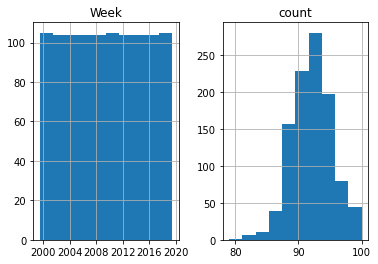

In [58]:
week_counts=billboard_corrected.groupby('Week')['Week'].count().to_frame()
week_counts.rename(columns={week_counts.columns[0]:'count'},inplace=True)
week_counts=week_counts.reset_index()

week_counts.hist()

In [59]:
week_counts.describe()

,count
count,1043.000000
mean,92.027804
std,2.999071
min,79.000000
25%,90.000000
50%,92.000000
75%,94.000000
max,100.000000


In [60]:
billboard_corrected['Year'].value_counts()

2017    4983
2009    4917
2004    4888
2016    4884
2018    4861
2012    4827
2003    4827
2000    4819
2006    4813
2014    4778
2005    4773
2013    4770
2010    4744
2008    4744
2001    4742
2002    4739
2015    4732
2011    4709
2007    4616
2019    2587
1999    2232
Name: Year, dtype: int64

In [61]:
#The year 1999 is missing at least 50% of it's data. I'll have to keep that in mind or at least note that it is
# incomplete in my analysis. 

year_1999=billboard_corrected[billboard_corrected['Year']==1999]

year_1999[year_1999['Weekly.rank']==1].count()

Unnamed: 0         24
Artists            24
Name               24
Weekly.rank        24
Peak.position      24
Weeks.on.chart     24
Week               24
Date                0
Genre              24
Writing.Credits    24
Lyrics             24
Features           13
Year               24
Month              24
number_artists     24
solo_week          24
dtype: int64

In [62]:
#Confirmed. The earliest occurance is not until July 1999. Not going to removed the data. Just will bear in mind
# during my analysis. 
year_1999.sort_values(by='Week')

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists,solo_week
29155,97165,Alabama,God Must Have Spent A Little More Time On You,34,33.0,1.0,1999-07-12,NaN,Country,NaN,God Must Have Spent A Little More Time On You ...,'N Sync,1999,7,1,1.0
28575,97179,Jordan Knight,Give It To You,50,10.0,1.0,1999-07-12,NaN,Pop,"Jimmy jam, Robin thicke, Terry lewis, Jordan k...",Give It to You \nYou say it's been too long\nS...,NaN,1999,7,1,1.0
91675,97177,JT Money,Who Dat,48,5.0,1.0,1999-07-12,NaN,Rap,NaN,Who Dat \nJack jack yeah!\nPut em up! Put em u...,Sole,1999,7,1,1.0
76644,97181,LFO,Summer Girls,52,52.0,1.0,1999-07-12,NaN,"Boy Band,Pop","Rich cronin, Bradd young, Dow brain","Summer Girls \nYeah, I like it when the girls ...",NaN,1999,7,1,1.0
87021,97224,Q,Vivrant Thing,98,98.0,1.0,1999-07-12,NaN,Rap,"Q tip, J dilla, Barry white",Vivrant Thing \nUh check it out now\nUh no dou...,NaN,1999,7,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18006,95010,Guy,Dancin',19,19.0,3.0,1999-12-27,NaN,R&;B,"Dj eddie f, Teddy riley, Balewa muhammad, Darr...",Dancing \nGUY\nCan I have this dance?\nI know ...,NaN,1999,12,1,3.0
16972,95061,Britney Spears,Crazy,76,10.0,16.0,1999-12-27,NaN,"Dance-Pop,Teen Pop,Pop","Max martin, David kreuger, Per magnusson, Jorg...","Crazy \nBaby, I'm so into you\nYou got that so...",NaN,1999,12,1,16.0
77775,95023,Filter,Take A Picture,34,34.0,6.0,1999-12-27,NaN,"Soundtrack,Adult Alternative,Pop-Rock,Post-Gru...",Richard patrick,"Take A Picture \nAwake on my airplane, awake o...",NaN,1999,12,1,6.0
45899,95013,Foo Fighters,Learn To Fly,22,22.0,12.0,1999-12-27,NaN,"Adult Alternative,Alternative Rock,Rock","Dave grohl, Nate mendel, Taylor hawkins",Learn to Fly \nRun and tell all of the angels\...,NaN,1999,12,1,12.0


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [63]:
#All of the work I did fixing the Weeks.on.chart inconsistencies and peak.position handled this part. 

#testing a fix on one specific instance i found above of an error in how a band name was listed. 
billboard_the_all=billboard_corrected.copy()
the_all=billboard_the_all[billboard_the_all['Artists'].str.contains('The All', case=False)]

index=the_all.index
index=list(index)

a=billboard_the_all.columns.get_loc('Artists')
for i in range(len(index)):
    billboard_the_all.iat[index[i],a]='The All-American Rejects'
    
billboard_the_all.iloc[index]

,Unnamed: 0,Artists,Name,Weekly.rank,Peak.position,Weeks.on.chart,Week,Date,Genre,Writing.Credits,Lyrics,Features,Year,Month,number_artists,solo_week
19468,68183,The All-American Rejects,Dirty Little Secret,87,87.0,1.0,2005-08-03,6-Jun-05,"Emo,Pop-Punk,Pop,Alternative Rock,Rock","Tyson ritter, Nick wheeler",Dirty Little Secret \nLet me know that I've do...,NaN,2005,8,1,1.0
19469,68008,The All-American Rejects,Dirty Little Secret,91,87.0,2.0,2005-08-17,6-Jun-05,"Emo,Pop-Punk,Pop,Alternative Rock,Rock","Tyson ritter, Nick wheeler",Dirty Little Secret \nLet me know that I've do...,NaN,2005,8,1,2.0
19470,67906,The All-American Rejects,Dirty Little Secret,80,80.0,3.0,2005-08-24,6-Jun-05,"Emo,Pop-Punk,Pop,Alternative Rock,Rock","Tyson ritter, Nick wheeler",Dirty Little Secret \nLet me know that I've do...,NaN,2005,8,1,3.0
19471,67812,The All-American Rejects,Dirty Little Secret,73,73.0,4.0,2005-08-31,6-Jun-05,"Emo,Pop-Punk,Pop,Alternative Rock,Rock","Tyson ritter, Nick wheeler",Dirty Little Secret \nLet me know that I've do...,NaN,2005,8,1,4.0
19472,67724,The All-American Rejects,Dirty Little Secret,76,73.0,5.0,2005-09-07,6-Jun-05,"Emo,Pop-Punk,Pop,Alternative Rock,Rock","Tyson ritter, Nick wheeler",Dirty Little Secret \nLet me know that I've do...,NaN,2005,9,1,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77522,77952,The All-American Rejects,"Swing, Swing",64,60.0,7.0,2003-07-29,2-Dec-02,"Pop-Rock,Power Pop,Rock","Nick wheeler, Tyson ritter","Swing, Swing \nDays swiftly come and go\nI'm d...",NaN,2003,7,1,7.0
77523,77864,The All-American Rejects,"Swing, Swing",66,60.0,8.0,2003-08-05,2-Dec-02,"Pop-Rock,Power Pop,Rock","Nick wheeler, Tyson ritter","Swing, Swing \nDays swiftly come and go\nI'm d...",NaN,2003,8,1,8.0
77524,77792,The All-American Rejects,"Swing, Swing",85,60.0,9.0,2003-08-12,2-Dec-02,"Pop-Rock,Power Pop,Rock","Nick wheeler, Tyson ritter","Swing, Swing \nDays swiftly come and go\nI'm d...",NaN,2003,8,1,9.0
77525,77707,The All-American Rejects,"Swing, Swing",90,60.0,10.0,2003-08-19,2-Dec-02,"Pop-Rock,Power Pop,Rock","Nick wheeler, Tyson ritter","Swing, Swing \nDays swiftly come and go\nI'm d...",NaN,2003,8,1,10.0


## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset?
2. Did the process of cleaning your data give you new insights into your dataset?
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations?